### Loading the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("./Store Sales.csv",parse_dates=['Order Date','Ship Date'])
df.sort_values(by=['Order Date'],inplace=True)
df.reset_index(drop=True,inplace=True)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,541,CA-2015-140795,2015-01-02,2015-03-02,First Class,BD-11500,Bradley Drucker,Consumer,United States,Green Bay,Wisconsin,54302.0,Central,TEC-AC-10001432,Technology,Accessories,Enermax Aurora Lite Keyboard,468.900
1,5714,US-2015-143707,2015-01-03,2015-05-03,Standard Class,HR-14770,Hallie Redmond,Home Office,United States,New York City,New York,10035.0,East,TEC-PH-10003655,Technology,Phones,Sannysis Cute Owl Design Soft Skin Case Cover ...,5.940
2,158,CA-2015-104269,2015-01-03,2015-06-03,Second Class,DB-13060,Dave Brooks,Consumer,United States,Seattle,Washington,98115.0,West,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,457.568
3,6549,CA-2015-113880,2015-01-03,2015-05-03,Standard Class,VF-21715,Vicky Freymann,Home Office,United States,Elmhurst,Illinois,60126.0,Central,OFF-PA-10003036,Office Supplies,Paper,"Black Print Carbonless 8 1/2"" x 8 1/4"" Rapid M...",17.472
4,7950,CA-2015-131009,2015-01-03,2015-05-03,Standard Class,SC-20380,Shahid Collister,Consumer,United States,El Paso,Texas,79907.0,Central,FUR-FU-10001095,Furniture,Furnishings,DAX Black Cherry Wood-Tone Poster Frame,63.552


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

#### Descriptive statistics

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,9800.0,4900.500000,2829.160653,1.000,2450.750,4900.50,7350.250,9800.00
Postal Code,9789.0,55273.322403,32041.223413,1040.000,23223.000,58103.00,90008.000,99301.00
Sales,9800.0,230.769059,626.651875,0.444,17.248,54.49,210.605,22638.48


#### Null values in percentage

In [5]:
df.isnull().mean()*100

Row ID           0.000000
Order ID         0.000000
Order Date       0.000000
Ship Date        0.000000
Ship Mode        0.000000
Customer ID      0.000000
Customer Name    0.000000
Segment          0.000000
Country          0.000000
City             0.000000
State            0.000000
Postal Code      0.112245
Region           0.000000
Product ID       0.000000
Category         0.000000
Sub-Category     0.000000
Product Name     0.000000
Sales            0.000000
dtype: float64

##### Here   Postal  Code contains 0.1% null values

#### Dropping the null values

In [6]:
df.dropna(inplace=True)
df.isnull().mean()*100

Row ID           0.0
Order ID         0.0
Order Date       0.0
Ship Date        0.0
Ship Mode        0.0
Customer ID      0.0
Customer Name    0.0
Segment          0.0
Country          0.0
City             0.0
State            0.0
Postal Code      0.0
Region           0.0
Product ID       0.0
Category         0.0
Sub-Category     0.0
Product Name     0.0
Sales            0.0
dtype: float64

#### Checking for duplicate values

In [7]:
df.duplicated().sum()

0

##### This dataset doesnot contain any duplicate values

#### Size of the dataset

In [8]:
df.shape

(9789, 18)

##### Store Sales dataset consist of 9800 rows and 18 columns.

In [9]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [10]:
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,541,CA-2015-140795,2015-01-02,2015-03-02,First Class,BD-11500,Bradley Drucker,Consumer,United States,Green Bay,Wisconsin,54302.0,Central,TEC-AC-10001432,Technology,Accessories,Enermax Aurora Lite Keyboard,468.900
1,5714,US-2015-143707,2015-01-03,2015-05-03,Standard Class,HR-14770,Hallie Redmond,Home Office,United States,New York City,New York,10035.0,East,TEC-PH-10003655,Technology,Phones,Sannysis Cute Owl Design Soft Skin Case Cover ...,5.940
2,158,CA-2015-104269,2015-01-03,2015-06-03,Second Class,DB-13060,Dave Brooks,Consumer,United States,Seattle,Washington,98115.0,West,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,457.568
3,6549,CA-2015-113880,2015-01-03,2015-05-03,Standard Class,VF-21715,Vicky Freymann,Home Office,United States,Elmhurst,Illinois,60126.0,Central,OFF-PA-10003036,Office Supplies,Paper,"Black Print Carbonless 8 1/2"" x 8 1/4"" Rapid M...",17.472
4,7950,CA-2015-131009,2015-01-03,2015-05-03,Standard Class,SC-20380,Shahid Collister,Consumer,United States,El Paso,Texas,79907.0,Central,FUR-FU-10001095,Furniture,Furnishings,DAX Black Cherry Wood-Tone Poster Frame,63.552
5,7951,CA-2015-131009,2015-01-03,2015-05-03,Standard Class,SC-20380,Shahid Collister,Consumer,United States,El Paso,Texas,79907.0,Central,OFF-ST-10001469,Office Supplies,Storage,Fellowes Bankers Box Recycled Super Stor/Drawer,129.552
6,7949,CA-2015-131009,2015-01-03,2015-05-03,Standard Class,SC-20380,Shahid Collister,Consumer,United States,El Paso,Texas,79907.0,Central,FUR-CH-10001270,Furniture,Chairs,Harbour Creations Steel Folding Chair,362.250
7,8311,CA-2015-168312,2015-01-03,2015-07-03,Standard Class,GW-14605,Giulietta Weimer,Consumer,United States,Houston,Texas,77036.0,Central,FUR-TA-10001866,Furniture,Tables,Bevis Round Conference Room Tables and Bases,376.509
8,8310,CA-2015-168312,2015-01-03,2015-07-03,Standard Class,GW-14605,Giulietta Weimer,Consumer,United States,Houston,Texas,77036.0,Central,OFF-ST-10003692,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,137.352
9,6548,CA-2015-113880,2015-01-03,2015-05-03,Standard Class,VF-21715,Vicky Freymann,Home Office,United States,Elmhurst,Illinois,60126.0,Central,FUR-CH-10000863,Furniture,Chairs,Novimex Swivel Fabric Task Chair,634.116


#### Dropping unwanted columns

In [11]:
df.drop(columns=["Order ID",'Row ID','Postal Code','Product ID','Customer ID'],inplace=True)

#### Renaming column names

In [12]:
df.rename(columns={'Order Date':'Order_Date','Ship Date':'Ship_Date','Ship Mode':'Ship_Mode','Customer Name':'Customer_Name',\
                 'Product Name':'Product_Name'},inplace=True)

#### Feature Engineering

In [13]:
df['Delay']=df['Ship_Date']-df['Order_Date']
df['Order_Month']=df.Order_Date.dt.month
df['Ship_Month']=df.Ship_Date.dt.month
df['Order_Year']=df.Order_Date.dt.year
df['Ship_Year']=df.Ship_Date.dt.year

In [14]:
df.head()

,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Country,City,State,Region,Category,Sub-Category,Product_Name,Sales,Delay,Order_Month,Ship_Month,Order_Year,Ship_Year
0,2015-01-02,2015-03-02,First Class,Bradley Drucker,Consumer,United States,Green Bay,Wisconsin,Central,Technology,Accessories,Enermax Aurora Lite Keyboard,468.900,59 days,1,3,2015,2015
1,2015-01-03,2015-05-03,Standard Class,Hallie Redmond,Home Office,United States,New York City,New York,East,Technology,Phones,Sannysis Cute Owl Design Soft Skin Case Cover ...,5.940,120 days,1,5,2015,2015
2,2015-01-03,2015-06-03,Second Class,Dave Brooks,Consumer,United States,Seattle,Washington,West,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,457.568,151 days,1,6,2015,2015
3,2015-01-03,2015-05-03,Standard Class,Vicky Freymann,Home Office,United States,Elmhurst,Illinois,Central,Office Supplies,Paper,"Black Print Carbonless 8 1/2"" x 8 1/4"" Rapid M...",17.472,120 days,1,5,2015,2015
4,2015-01-03,2015-05-03,Standard Class,Shahid Collister,Consumer,United States,El Paso,Texas,Central,Furniture,Furnishings,DAX Black Cherry Wood-Tone Poster Frame,63.552,120 days,1,5,2015,2015


In [15]:
df['Delay']=df["Delay"].astype("str")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9789 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order_Date     9789 non-null   datetime64[ns]
 1   Ship_Date      9789 non-null   datetime64[ns]
 2   Ship_Mode      9789 non-null   object        
 3   Customer_Name  9789 non-null   object        
 4   Segment        9789 non-null   object        
 5   Country        9789 non-null   object        
 6   City           9789 non-null   object        
 7   State          9789 non-null   object        
 8   Region         9789 non-null   object        
 9   Category       9789 non-null   object        
 10  Sub-Category   9789 non-null   object        
 11  Product_Name   9789 non-null   object        
 12  Sales          9789 non-null   float64       
 13  Delay          9789 non-null   object        
 14  Order_Month    9789 non-null   int64         
 15  Ship_Month     9789 n

In [16]:
df['Delay']=df.Delay.str.replace("\D","",regex=True)
df.head()

,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Country,City,State,Region,Category,Sub-Category,Product_Name,Sales,Delay,Order_Month,Ship_Month,Order_Year,Ship_Year
0,2015-01-02,2015-03-02,First Class,Bradley Drucker,Consumer,United States,Green Bay,Wisconsin,Central,Technology,Accessories,Enermax Aurora Lite Keyboard,468.900,59,1,3,2015,2015
1,2015-01-03,2015-05-03,Standard Class,Hallie Redmond,Home Office,United States,New York City,New York,East,Technology,Phones,Sannysis Cute Owl Design Soft Skin Case Cover ...,5.940,120,1,5,2015,2015
2,2015-01-03,2015-06-03,Second Class,Dave Brooks,Consumer,United States,Seattle,Washington,West,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,457.568,151,1,6,2015,2015
3,2015-01-03,2015-05-03,Standard Class,Vicky Freymann,Home Office,United States,Elmhurst,Illinois,Central,Office Supplies,Paper,"Black Print Carbonless 8 1/2"" x 8 1/4"" Rapid M...",17.472,120,1,5,2015,2015
4,2015-01-03,2015-05-03,Standard Class,Shahid Collister,Consumer,United States,El Paso,Texas,Central,Furniture,Furnishings,DAX Black Cherry Wood-Tone Poster Frame,63.552,120,1,5,2015,2015


In [17]:
df['Delay']=df.Delay.astype("int")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9789 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order_Date     9789 non-null   datetime64[ns]
 1   Ship_Date      9789 non-null   datetime64[ns]
 2   Ship_Mode      9789 non-null   object        
 3   Customer_Name  9789 non-null   object        
 4   Segment        9789 non-null   object        
 5   Country        9789 non-null   object        
 6   City           9789 non-null   object        
 7   State          9789 non-null   object        
 8   Region         9789 non-null   object        
 9   Category       9789 non-null   object        
 10  Sub-Category   9789 non-null   object        
 11  Product_Name   9789 non-null   object        
 12  Sales          9789 non-null   float64       
 13  Delay          9789 non-null   int32         
 14  Order_Month    9789 non-null   int64         
 15  Ship_Month     9789 n

In [18]:
df['Weekday']=df.Order_Date.dt.dayofweek
df.head()

,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Country,City,State,Region,Category,Sub-Category,Product_Name,Sales,Delay,Order_Month,Ship_Month,Order_Year,Ship_Year,Weekday
0,2015-01-02,2015-03-02,First Class,Bradley Drucker,Consumer,United States,Green Bay,Wisconsin,Central,Technology,Accessories,Enermax Aurora Lite Keyboard,468.900,59,1,3,2015,2015,4
1,2015-01-03,2015-05-03,Standard Class,Hallie Redmond,Home Office,United States,New York City,New York,East,Technology,Phones,Sannysis Cute Owl Design Soft Skin Case Cover ...,5.940,120,1,5,2015,2015,5
2,2015-01-03,2015-06-03,Second Class,Dave Brooks,Consumer,United States,Seattle,Washington,West,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,457.568,151,1,6,2015,2015,5
3,2015-01-03,2015-05-03,Standard Class,Vicky Freymann,Home Office,United States,Elmhurst,Illinois,Central,Office Supplies,Paper,"Black Print Carbonless 8 1/2"" x 8 1/4"" Rapid M...",17.472,120,1,5,2015,2015,5
4,2015-01-03,2015-05-03,Standard Class,Shahid Collister,Consumer,United States,El Paso,Texas,Central,Furniture,Furnishings,DAX Black Cherry Wood-Tone Poster Frame,63.552,120,1,5,2015,2015,5


In [19]:
df.Weekday.unique()

array([4, 5, 6, 1, 2, 3, 0], dtype=int64)

In [20]:
df['WeekDayNum']=df.Weekday

In [21]:
df.Weekday.replace({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'},inplace=True)
df.head()

,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Country,City,State,Region,Category,Sub-Category,Product_Name,Sales,Delay,Order_Month,Ship_Month,Order_Year,Ship_Year,Weekday,WeekDayNum
0,2015-01-02,2015-03-02,First Class,Bradley Drucker,Consumer,United States,Green Bay,Wisconsin,Central,Technology,Accessories,Enermax Aurora Lite Keyboard,468.900,59,1,3,2015,2015,Thursday,4
1,2015-01-03,2015-05-03,Standard Class,Hallie Redmond,Home Office,United States,New York City,New York,East,Technology,Phones,Sannysis Cute Owl Design Soft Skin Case Cover ...,5.940,120,1,5,2015,2015,Friday,5
2,2015-01-03,2015-06-03,Second Class,Dave Brooks,Consumer,United States,Seattle,Washington,West,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,457.568,151,1,6,2015,2015,Friday,5
3,2015-01-03,2015-05-03,Standard Class,Vicky Freymann,Home Office,United States,Elmhurst,Illinois,Central,Office Supplies,Paper,"Black Print Carbonless 8 1/2"" x 8 1/4"" Rapid M...",17.472,120,1,5,2015,2015,Friday,5
4,2015-01-03,2015-05-03,Standard Class,Shahid Collister,Consumer,United States,El Paso,Texas,Central,Furniture,Furnishings,DAX Black Cherry Wood-Tone Poster Frame,63.552,120,1,5,2015,2015,Friday,5


In [22]:
df.drop(columns=['Order_Date','Ship_Date'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9789 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ship_Mode      9789 non-null   object 
 1   Customer_Name  9789 non-null   object 
 2   Segment        9789 non-null   object 
 3   Country        9789 non-null   object 
 4   City           9789 non-null   object 
 5   State          9789 non-null   object 
 6   Region         9789 non-null   object 
 7   Category       9789 non-null   object 
 8   Sub-Category   9789 non-null   object 
 9   Product_Name   9789 non-null   object 
 10  Sales          9789 non-null   float64
 11  Delay          9789 non-null   int32  
 12  Order_Month    9789 non-null   int64  
 13  Ship_Month     9789 non-null   int64  
 14  Order_Year     9789 non-null   int64  
 15  Ship_Year      9789 non-null   int64  
 16  Weekday        9789 non-null   object 
 17  WeekDayNum     9789 non-null   int64  
dtypes: float

In [23]:
df.Ship_Mode.unique()

array(['First Class', 'Standard Class', 'Second Class', 'Same Day'],
      dtype=object)

In [24]:
df.Segment.unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

In [25]:
df.Country.unique()

array(['United States'], dtype=object)

In [26]:
#Dropping Country column because there is only one country United States

In [27]:
df.drop(columns=['Country'],inplace=True)

In [28]:
df.Region.unique()

array(['Central', 'East', 'West', 'South'], dtype=object)

In [29]:
df.Category.unique()

array(['Technology', 'Furniture', 'Office Supplies'], dtype=object)

In [30]:
df['Sub-Category'].unique()

array(['Accessories', 'Phones', 'Chairs', 'Paper', 'Furnishings',
       'Storage', 'Tables', 'Fasteners', 'Binders', 'Labels',
       'Appliances', 'Art', 'Copiers', 'Bookcases', 'Envelopes',
       'Machines', 'Supplies'], dtype=object)

### Graphical EDA

#### Univariate Analysis

#### Histplot

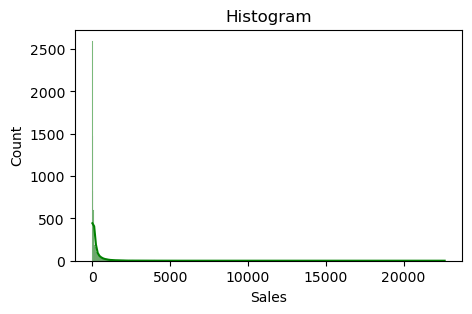

In [31]:
plt.figure(figsize=(5,3))
sns.histplot(data=df,x='Sales',kde=True,color='green')
plt.title("Histogram")
plt.show()

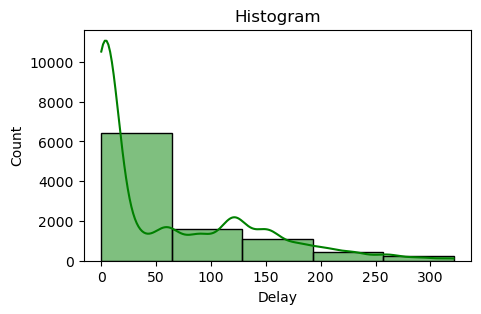

In [32]:
plt.figure(figsize=(5,3))
sns.histplot(data=df,x='Delay',bins=5,kde=True,color='green')
plt.title("Histogram")
plt.show()

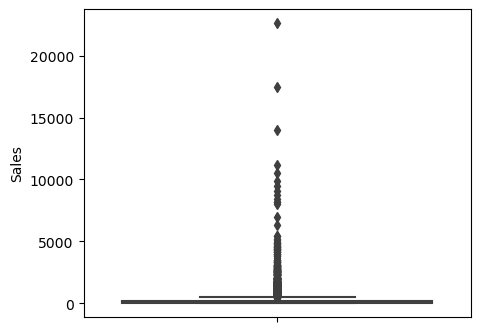

In [33]:
plt.figure(figsize=(5,4))
sns.boxplot(data=df,y='Sales')
plt.show()

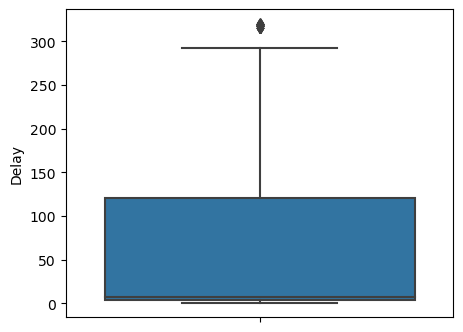

In [34]:
plt.figure(figsize=(5,4))
sns.boxplot(data=df,y='Delay')
plt.show()

In [35]:
df.head()

,Ship_Mode,Customer_Name,Segment,City,State,Region,Category,Sub-Category,Product_Name,Sales,Delay,Order_Month,Ship_Month,Order_Year,Ship_Year,Weekday,WeekDayNum
0,First Class,Bradley Drucker,Consumer,Green Bay,Wisconsin,Central,Technology,Accessories,Enermax Aurora Lite Keyboard,468.900,59,1,3,2015,2015,Thursday,4
1,Standard Class,Hallie Redmond,Home Office,New York City,New York,East,Technology,Phones,Sannysis Cute Owl Design Soft Skin Case Cover ...,5.940,120,1,5,2015,2015,Friday,5
2,Second Class,Dave Brooks,Consumer,Seattle,Washington,West,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,457.568,151,1,6,2015,2015,Friday,5
3,Standard Class,Vicky Freymann,Home Office,Elmhurst,Illinois,Central,Office Supplies,Paper,"Black Print Carbonless 8 1/2"" x 8 1/4"" Rapid M...",17.472,120,1,5,2015,2015,Friday,5
4,Standard Class,Shahid Collister,Consumer,El Paso,Texas,Central,Furniture,Furnishings,DAX Black Cherry Wood-Tone Poster Frame,63.552,120,1,5,2015,2015,Friday,5


#### Multivariate Analysis

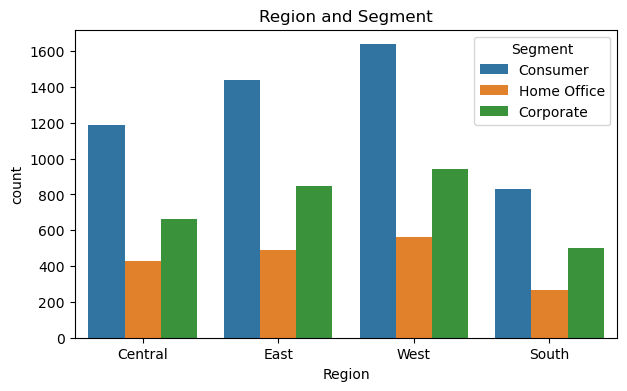

In [36]:
plt.figure(figsize=(7,4))
sns.countplot(data=df,x='Region',hue='Segment')
plt.title("Region and Segment")
plt.show()

##### In all Regions Consumer Segment are the most ones.

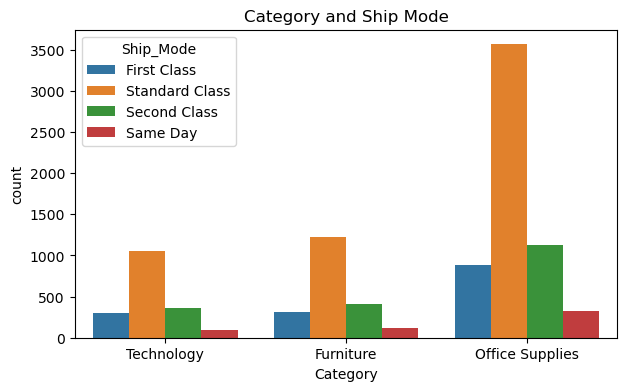

In [37]:
plt.figure(figsize=(7,4))
sns.countplot(data=df,x='Category',hue='Ship_Mode')
plt.title("Category and Ship Mode")
plt.show()

##### Standard Class is the most used Ship Mode and Office Supplies were the mostly ones used this mode.

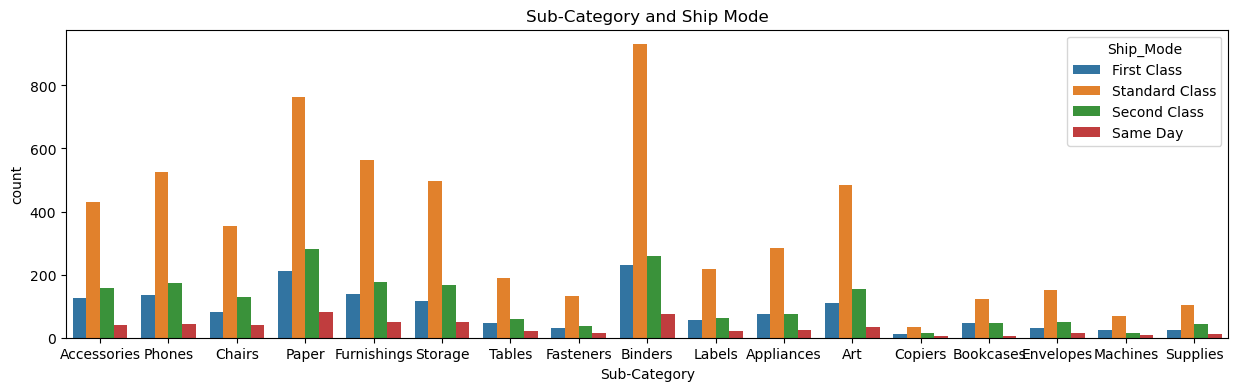

In [38]:
plt.figure(figsize=(15,4))
sns.countplot(data=df,x='Sub-Category',hue='Ship_Mode')
plt.title("Sub-Category and Ship Mode")
plt.show()

##### Binders were shipped mostly through Standard Class anf First class. Paper were transported mostly in the Second class.

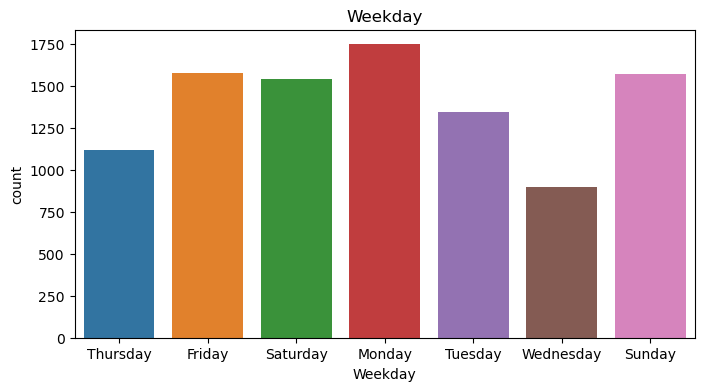

In [39]:
plt.figure(figsize=(8,4))
sns.countplot(data=df,x='Weekday')
plt.title("Weekday")
plt.show()

##### Customers made their Orders mostly on Monday.

In [40]:
df.sort_values(by='WeekDayNum',inplace=True)

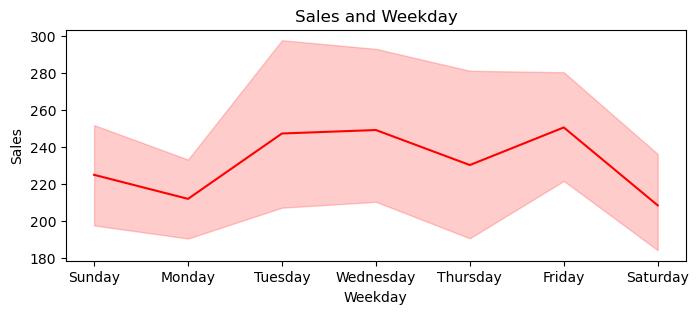

In [41]:
plt.figure(figsize=(8,3))
sns.lineplot(data=df,x='Weekday',y='Sales',color='red')
plt.title("Sales and Weekday")
plt.show()

##### Sales is at peek on Friday.

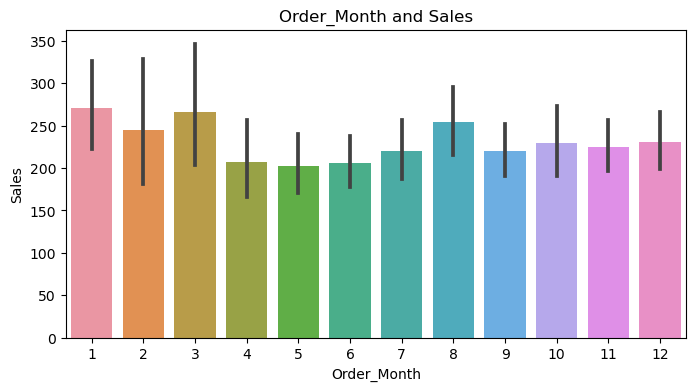

In [42]:
plt.figure(figsize=(8,4))
sns.barplot(data=df,x='Order_Month',y='Sales')
plt.title("Order_Month and Sales")
plt.show()

##### For most of the Order there is no Delay.

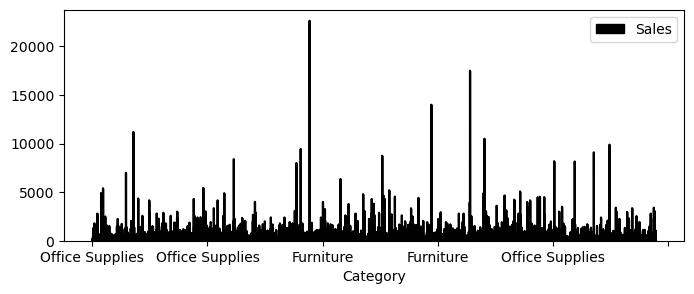

In [43]:
df.plot.area('Category','Sales',figsize=(8,3),cmap='gist_earth');

In [44]:
df.Region.value_counts().index

Index(['West', 'East', 'Central', 'South'], dtype='object')

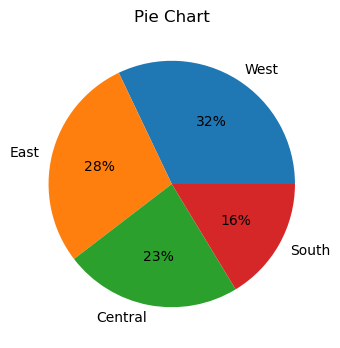

In [45]:
plt.figure(figsize=(5,4))
plt.pie(data=df,x=df.Region.value_counts(),labels=['West', 'East', 'Central', 'South'],autopct='%1.0f%%')
plt.title("Pie Chart")
plt.show()

##### West Region made 32% Orders.

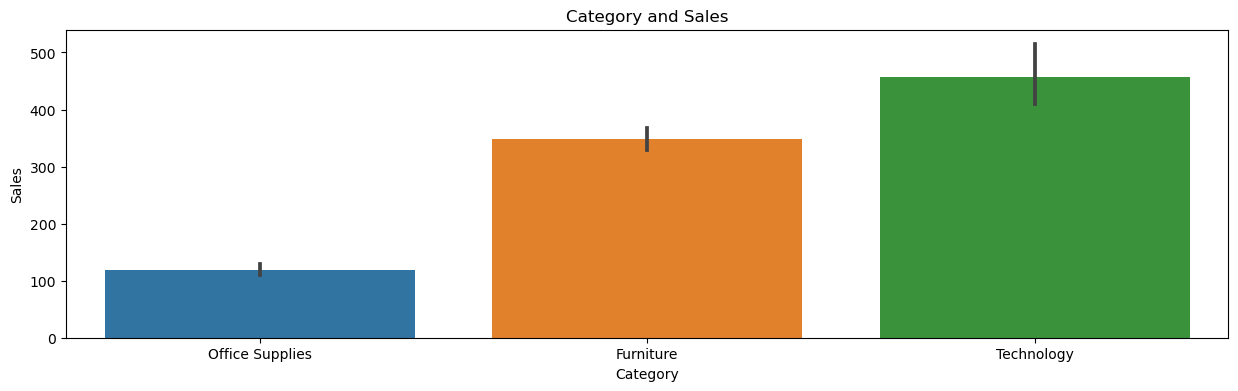

In [46]:
plt.figure(figsize=(15,4))
sns.barplot(data=df,x='Category',y='Sales')
plt.title("Category and Sales")
plt.show()

##### Category Technology contributes highly to the Sales 

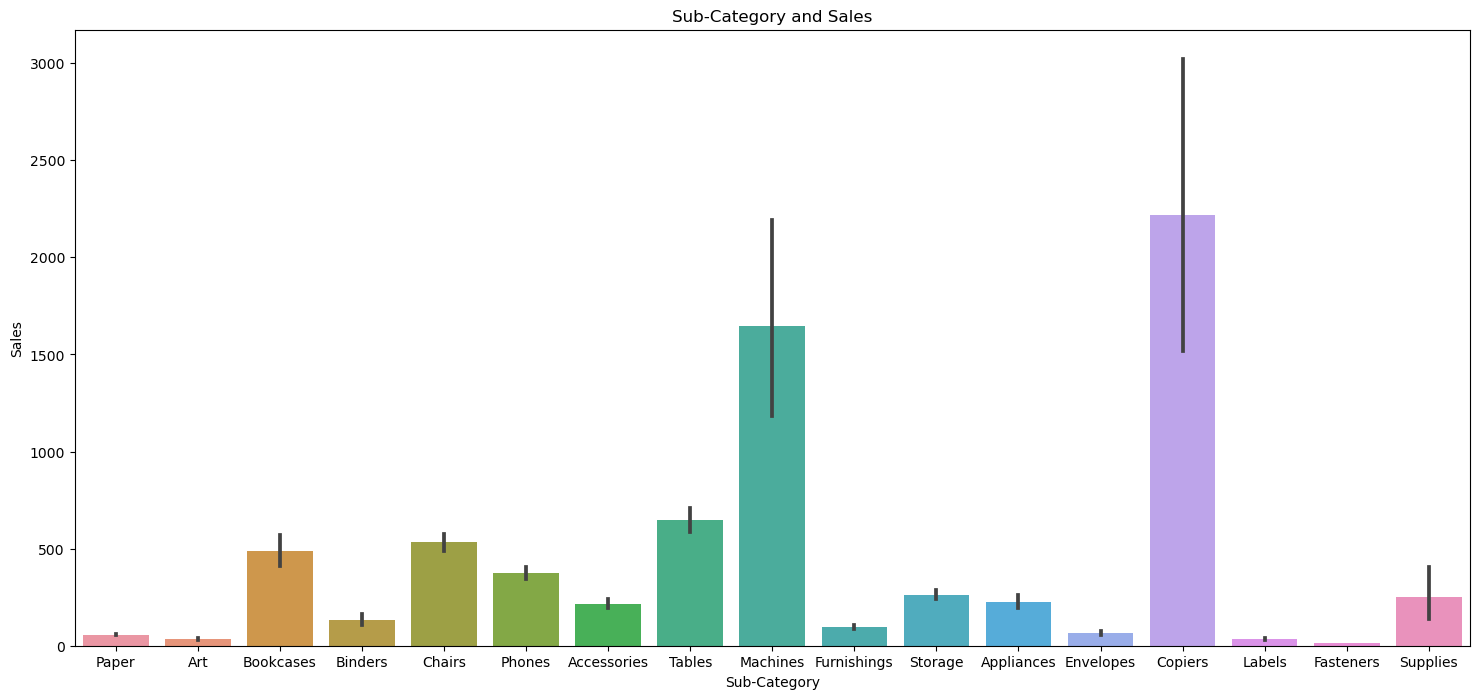

In [47]:
plt.figure(figsize=(18,8))
sns.barplot(data=df,x='Sub-Category',y='Sales')
plt.title("Sub-Category and Sales")
plt.show()

##### The Sub-Category Copiers contributed mostly to the Sales

In [48]:
Category_Delay = df.groupby(['Category'])['Delay'].sum()
Category_Delay

Category
Furniture          124856
Office Supplies    350716
Technology         110869
Name: Delay, dtype: int32

In [49]:
Category_Delay.index

Index(['Furniture', 'Office Supplies', 'Technology'], dtype='object', name='Category')

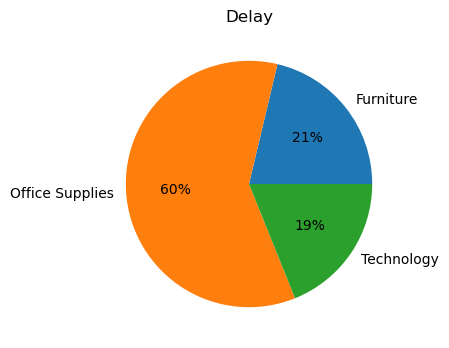

In [50]:
plt.figure(figsize=(5,4))
plt.pie(data=Category_Delay,x=Category_Delay,labels=['Furniture', 'Office Supplies', 'Technology'],autopct='%1.0f%%')
plt.title("Delay")
plt.show()

##### Office Supplies got Delayed the most

In [51]:
Sub_Category_Delay = df.groupby(['Sub-Category'])['Delay'].sum()
Sub_Category_Delay.sort_values(ascending=False, inplace=True)

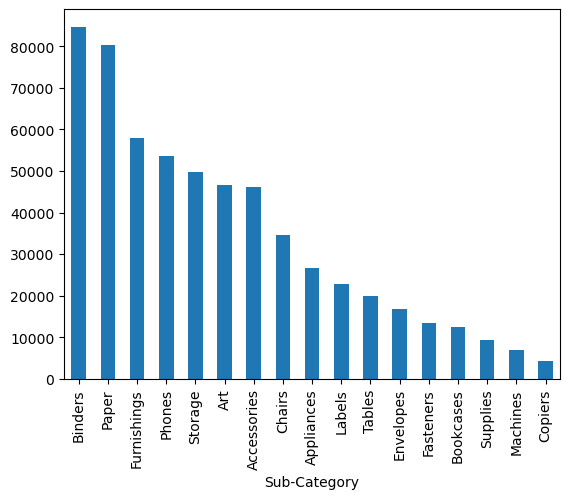

In [52]:
Sub_Category_Delay.plot.bar();

#### Binders got Delayed the most.

In [53]:
State_Sales = df.groupby(['State'])['Sales'].sum()
State_Sales

State
Alabama                  19510.6400
Arizona                  35272.6570
Arkansas                 11678.1300
California              446306.4635
Colorado                 31841.5980
Connecticut              13384.3570
Delaware                 27322.9990
District of Columbia      2865.0200
Florida                  88436.5320
Georgia                  48219.1100
Idaho                     4382.4860
Illinois                 79236.5170
Indiana                  48718.4000
Iowa                      4443.5600
Kansas                    2914.3100
Kentucky                 36458.3900
Louisiana                 9131.0500
Maine                     1270.5300
Maryland                 23705.5230
Massachusetts            28634.4340
Michigan                 76136.0740
Minnesota                29863.1500
Mississippi              10771.3400
Missouri                 22205.1500
Montana                   5589.3520
Nebraska                  7464.9300
Nevada                   16729.1020
New Hampshire         

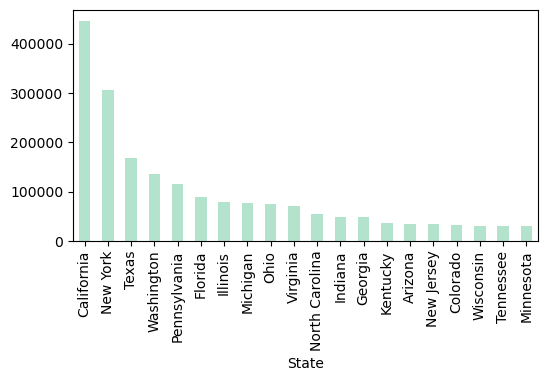

In [54]:
State_Sales.sort_values(ascending=False)[:20].plot.bar('State','Sales',figsize=(6,3),cmap='Pastel2');

##### California had the highest Sales

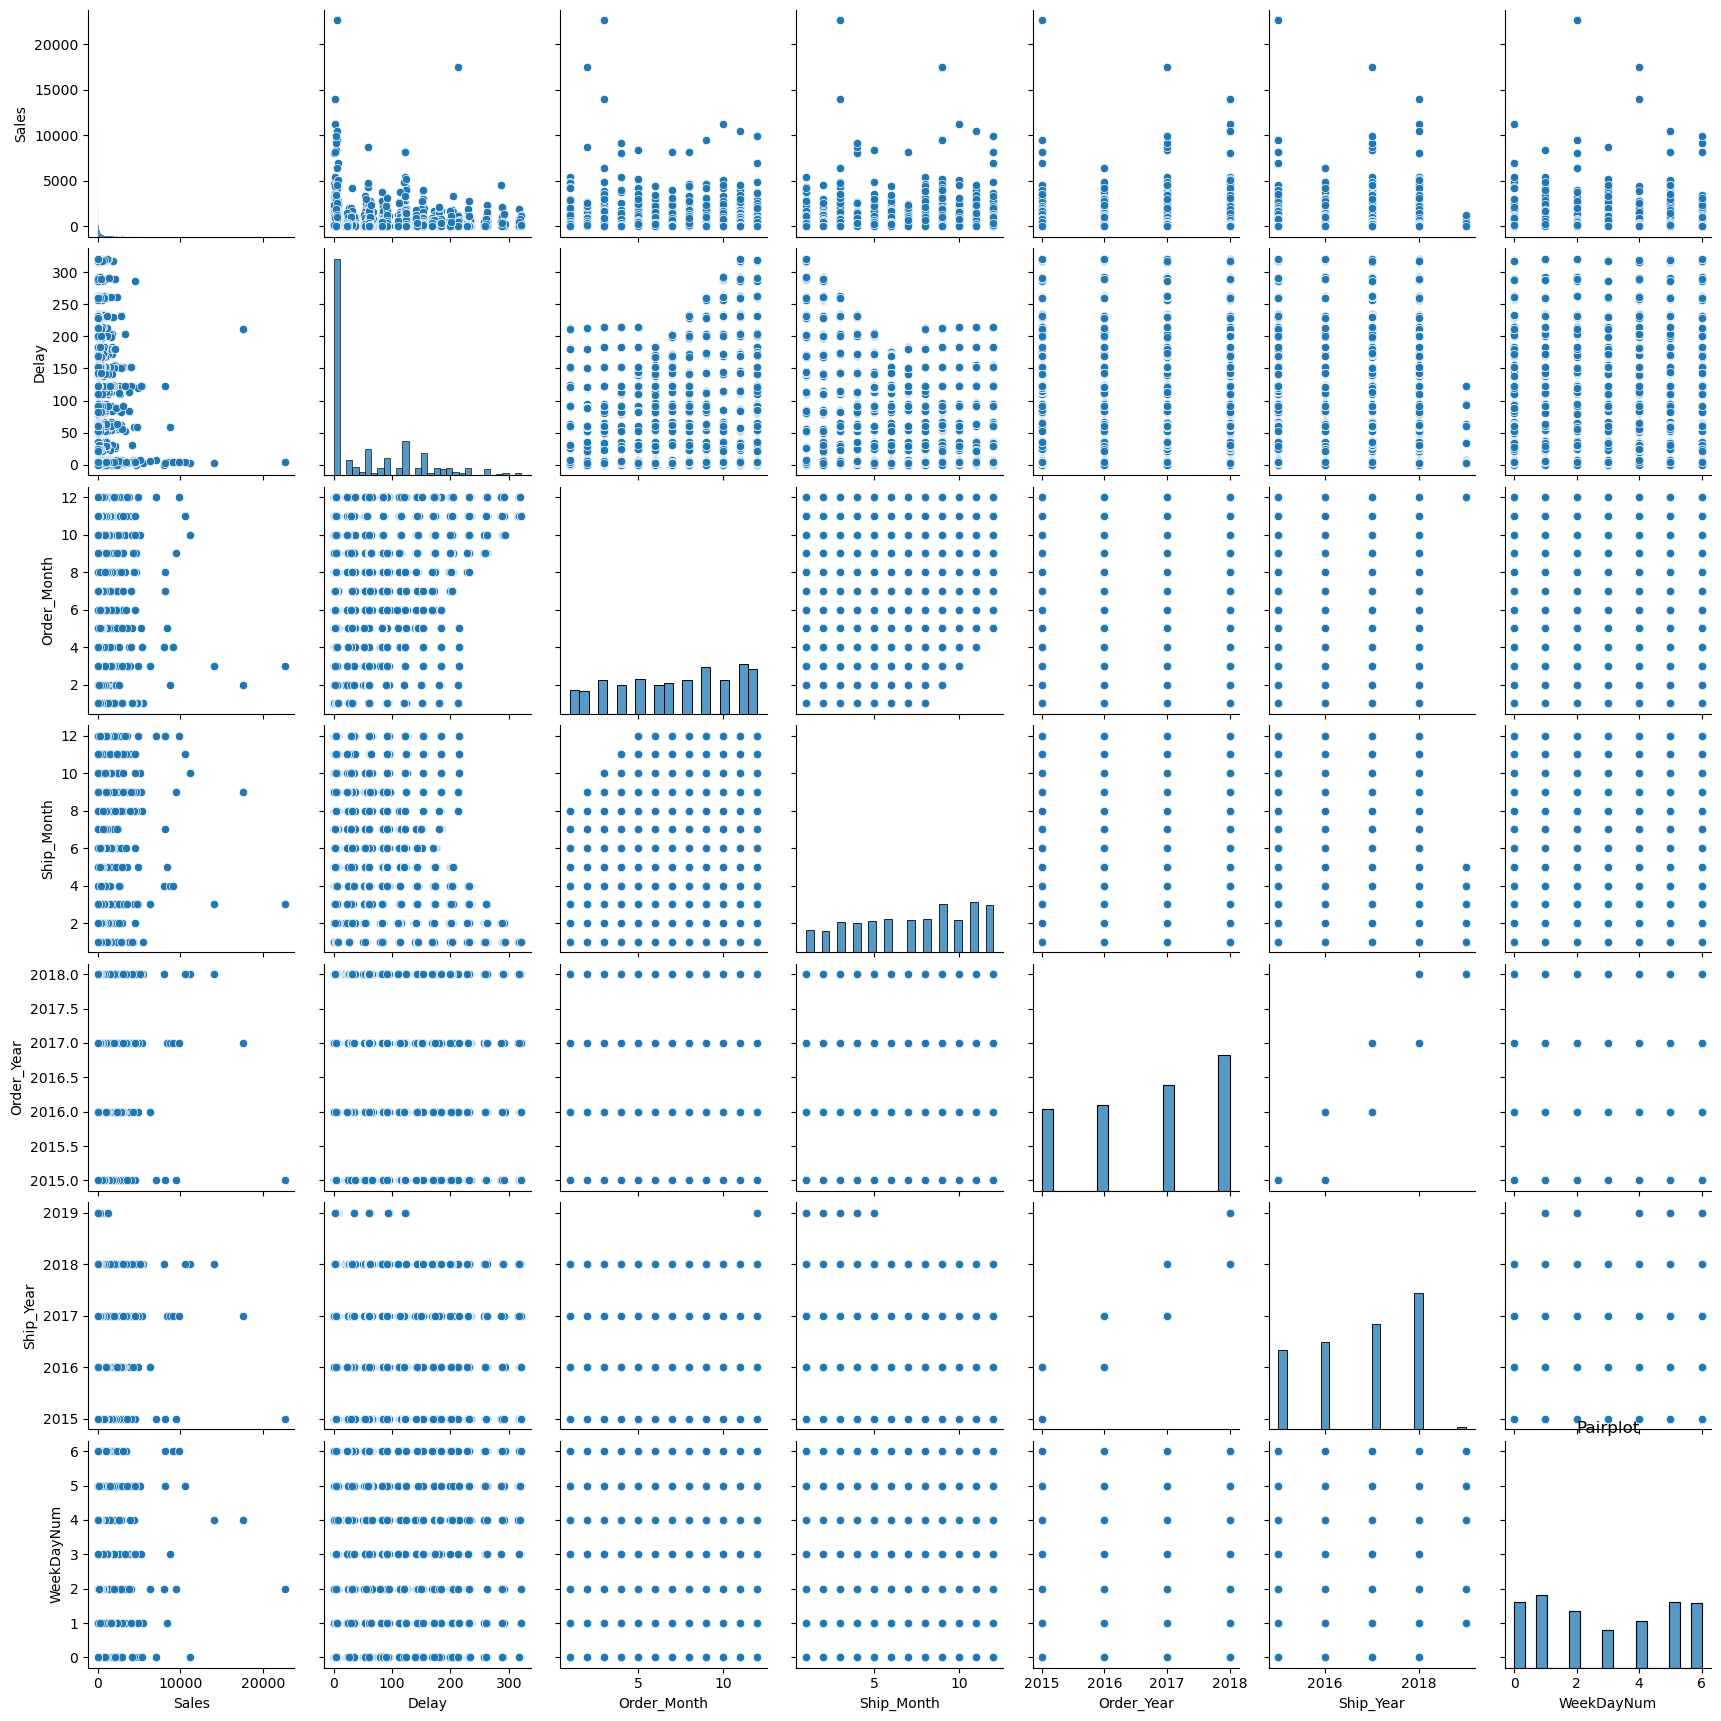

In [55]:
sns.pairplot(df)
plt.title("Pairplot")
plt.show()

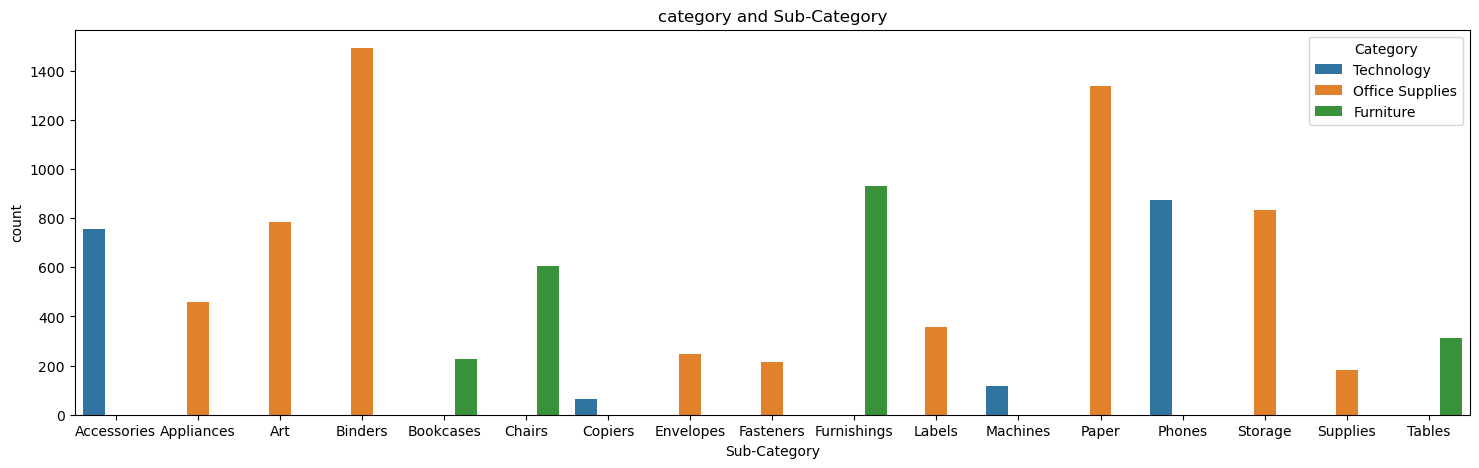

In [56]:
plt.figure(figsize=(18,5))
sns.countplot(data=df.sort_values(by='Sub-Category'),x='Sub-Category',hue='Category')
plt.title("category and Sub-Category")
plt.show()

##### Acessories,Copiers,Machines and Phones belongs to the Technology Category. Appliances,Art,Binders,Envelopes,Fastneres,Labels,Paper,Storage and Supplies belongs to the Office Supplies. The rest of them belongs to the Furniture Category.

### New DataFrame based on state

In [57]:
def sort_state(state):
    df_state=df[df['State']==state]
    df_state.drop(columns=['State'],inplace=True)
    return df_state

In [58]:
New_York_data=sort_state('New York')
New_York_data

,Ship_Mode,Customer_Name,Segment,City,Region,Category,Sub-Category,Product_Name,Sales,Delay,Order_Month,Ship_Month,Order_Year,Ship_Year,Weekday,WeekDayNum
9135,Second Class,Zuschuss Carroll,Consumer,New York City,East,Office Supplies,Art,Panasonic KP-4ABK Battery-Operated Pencil Shar...,43.920,173,11,5,2018,2018,Sunday,0
1230,Standard Class,Sara Luxemburg,Home Office,New York City,East,Office Supplies,Art,Boston 16801 Nautilus Battery Pencil Sharpener,66.030,4,9,9,2015,2015,Sunday,0
7173,Standard Class,Catherine Glotzbach,Home Office,New York City,East,Office Supplies,Labels,Avery 506,28.910,5,3,3,2018,2018,Sunday,0
1177,Same Day,Darrin Martin,Consumer,New York City,East,Technology,Machines,Ativa V4110MDD Micro-Cut Shredder,2799.960,0,9,9,2015,2015,Sunday,0
1174,Same Day,Darrin Martin,Consumer,New York City,East,Office Supplies,Appliances,Honeywell Enviracaire Portable HEPA Air Cleane...,601.300,0,9,9,2015,2015,Sunday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3363,Standard Class,Bobby Odegard,Consumer,New York City,East,Office Supplies,Art,Manco Dry-Lighter Erasable Highlighter,6.080,22,10,9,2016,2016,Saturday,6
7913,Second Class,George Ashbrook,Consumer,New York City,East,Furniture,Furnishings,"Deflect-o RollaMat Studded, Beveled Mat for Me...",276.690,2,6,6,2018,2018,Saturday,6
3276,First Class,Dan Reichenbach,Corporate,New York City,East,Technology,Accessories,Razer Kraken 7.1 Surround Sound Over Ear USB G...,899.910,2,9,9,2016,2016,Saturday,6
3283,Same Day,Carlos Soltero,Consumer,Freeport,East,Office Supplies,Paper,Xerox 1923,20.040,0,9,9,2016,2016,Saturday,6


In [59]:
New_York_data.City.value_counts()

New York City    891
Rochester         36
Long Beach        32
Oceanside         22
Auburn            17
Yonkers           15
Troy              15
Hempstead         11
Buffalo           10
Watertown         10
Mount Vernon       8
Utica              7
New Rochelle       6
Rome               6
Freeport           6
Jamestown          2
Niagara Falls      2
Lindenhurst        1
Name: City, dtype: int64

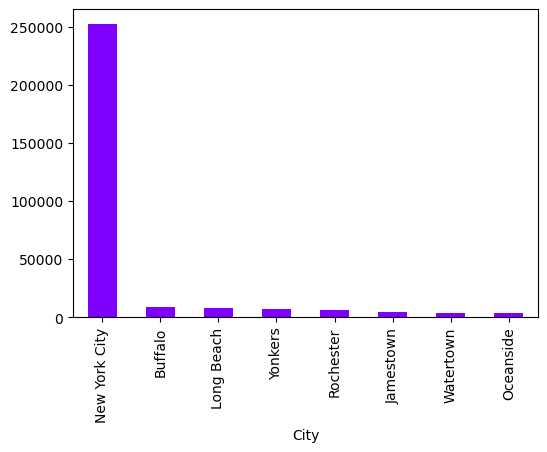

In [60]:
city_sales_in_New_York=New_York_data.groupby(['City'])['Sales'].sum()
city_sales_in_New_York.sort_values(ascending=False)[:8].plot.bar('City','Sales',figsize=(6,4),cmap='rainbow');

#### New York City highly contributed to the total Sales.

In [61]:
New_York_data.Segment.value_counts().index

Index(['Consumer', 'Corporate', 'Home Office'], dtype='object')

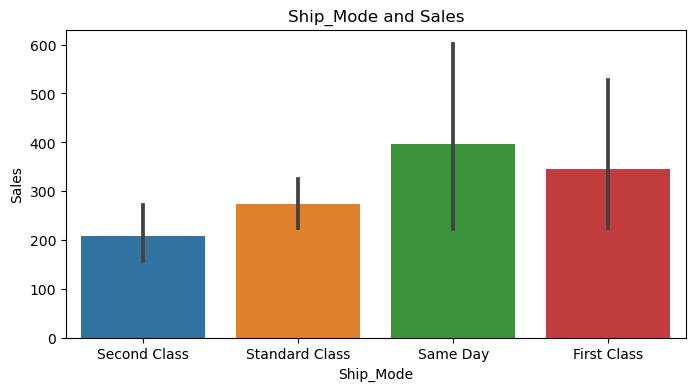

In [62]:
plt.figure(figsize=(8,4))
sns.barplot(data=New_York_data,x='Ship_Mode',y='Sales')
plt.title("Ship_Mode and Sales")
plt.show()

In [63]:
New_York_data.Customer_Name.value_counts()

Seth Vernon         14
Ann Chong           13
Peter Fuller        10
Naresj Patel        10
Denny Blanton        9
                    ..
Michael Stewart      1
Michelle Arnett      1
Shirley Daniels      1
Jennifer Braxton     1
Bobby Odegard        1
Name: Customer_Name, Length: 409, dtype: int64

In [64]:
New_York_data.City.value_counts()

New York City    891
Rochester         36
Long Beach        32
Oceanside         22
Auburn            17
Yonkers           15
Troy              15
Hempstead         11
Buffalo           10
Watertown         10
Mount Vernon       8
Utica              7
New Rochelle       6
Rome               6
Freeport           6
Jamestown          2
Niagara Falls      2
Lindenhurst        1
Name: City, dtype: int64

In [65]:
segment_delay_in_new_york=New_York_data.groupby(['Segment'])['Delay'].sum()
segment_delay_in_new_york

Segment
Consumer       39555
Corporate      16689
Home Office     9805
Name: Delay, dtype: int32

<Figure size 700x300 with 0 Axes>

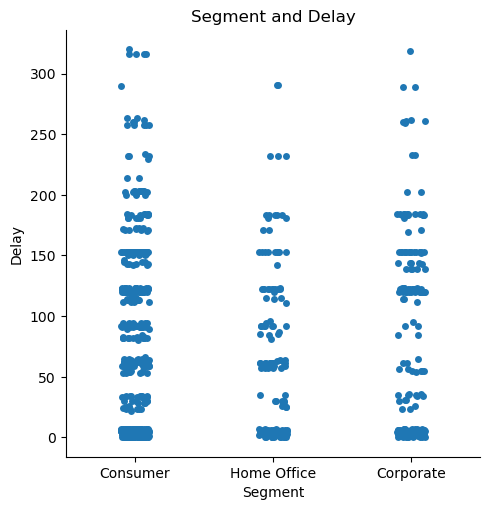

In [66]:
plt.figure(figsize=(7,3))
sns.catplot(data=New_York_data,x='Segment',y='Delay')
plt.title("Segment and Delay")
plt.show()

#### In New York Consumer Segment are Delayed

In [67]:
Home_Office_sales_over_year=New_York_data.query("Segment=='Home Office'")
Home_Office_sales_over_year

,Ship_Mode,Customer_Name,Segment,City,Region,Category,Sub-Category,Product_Name,Sales,Delay,Order_Month,Ship_Month,Order_Year,Ship_Year,Weekday,WeekDayNum
1230,Standard Class,Sara Luxemburg,Home Office,New York City,East,Office Supplies,Art,Boston 16801 Nautilus Battery Pencil Sharpener,66.030,4,9,9,2015,2015,Sunday,0
7173,Standard Class,Catherine Glotzbach,Home Office,New York City,East,Office Supplies,Labels,Avery 506,28.910,5,3,3,2018,2018,Sunday,0
9316,Same Day,Anne Pryor,Home Office,New York City,East,Office Supplies,Binders,Acco Data Flex Cable Posts For Top & Bottom Lo...,58.408,0,11,11,2018,2018,Sunday,0
9317,Same Day,Anne Pryor,Home Office,New York City,East,Furniture,Tables,Hon 61000 Series Interactive Training Tables,79.974,0,11,11,2018,2018,Sunday,0
9321,First Class,Adrian Shami,Home Office,New York City,East,Office Supplies,Binders,Avery Printable Repositionable Plastic Tabs,41.280,3,11,11,2018,2018,Sunday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7797,Standard Class,Cyra Reiten,Home Office,New York City,East,Technology,Accessories,Logitech G430 Surround Sound Gaming Headset wi...,319.960,183,6,12,2018,2018,Saturday,6
3137,Standard Class,Dean percer,Home Office,New York City,East,Office Supplies,Storage,"Perma STOR-ALL Hanging File Box, 13 1/8""W x 12...",17.940,64,9,11,2016,2016,Saturday,6
3135,Standard Class,Dean percer,Home Office,New York City,East,Technology,Machines,Zebra ZM400 Thermal Label Printer,2321.900,64,9,11,2016,2016,Saturday,6
7866,Standard Class,Steven Roelle,Home Office,New York City,East,Technology,Accessories,Kingston Digital DataTraveler 64GB USB 2.0,101.340,4,6,6,2018,2018,Saturday,6


In [68]:
New_York_data_year_Sales = Home_Office_sales_over_year.groupby(['Order_Year'])['Sales'].sum()
New_York_data_year_Sales

Order_Year
2015     8306.236
2016    10750.908
2017     9773.266
2018    28601.463
Name: Sales, dtype: float64

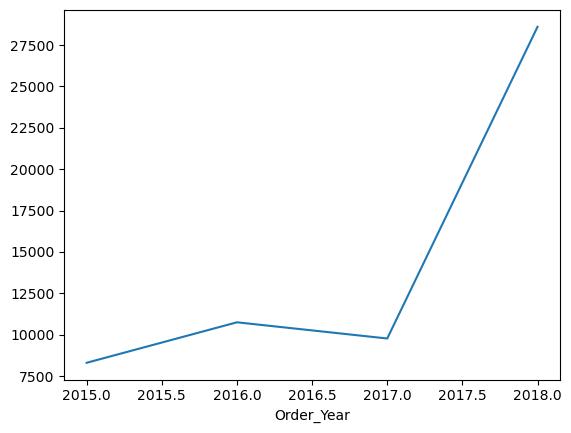

In [69]:
New_York_data_year_Sales.plot.line();

##### In New York, Home Office Segment's Sales increased from 2017-2018.

In [70]:
month_delay=New_York_data.groupby(['Order_Month'])['Delay'].mean()
month_delay

Order_Month
1     81.828125
2     73.293103
3     64.988764
4     74.493976
5     84.105882
6     66.597938
7     50.651163
8     39.605634
9     46.500000
10    57.406250
11    57.868421
12    44.721154
Name: Delay, dtype: float64

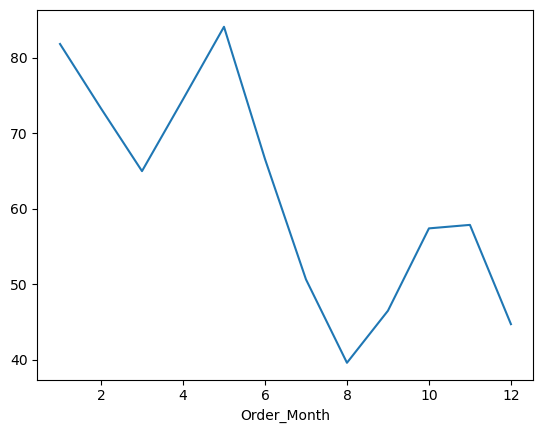

In [71]:
month_delay.plot.line();

##### Orders got Delayed by 80 days on the month of May in New York.

In [72]:
weekday_delay=New_York_data.groupby(['Weekday'])['Delay'].mean()
weekday_delay

Weekday
Friday       56.152632
Monday       61.433526
Saturday     54.232877
Sunday       63.804598
Thursday     70.642384
Tuesday      59.392857
Wednesday    54.878049
Name: Delay, dtype: float64

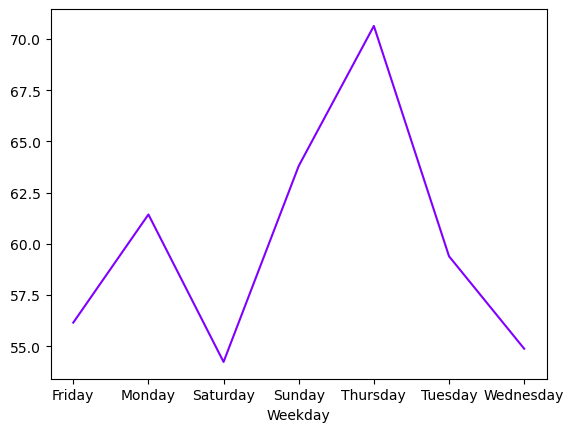

In [73]:
weekday_delay.plot.line(cmap='rainbow');

##### Average Delay was least on Saturday in New york

<Figure size 700x300 with 0 Axes>

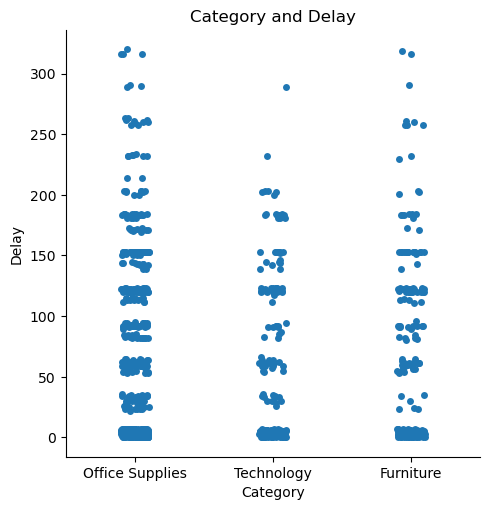

In [74]:
plt.figure(figsize=(7,3))
sns.catplot(data=New_York_data,x='Category',y='Delay')
plt.title("Category and Delay")
plt.show()

#### In New York Office Supplies are Delayed the most.

### New DataFrame based on Category

In [75]:
def sort_category(category):
    df_category=df[df['Category']==category]
    df_category.drop(columns=['Category'],inplace=True)
    return df_category

In [76]:
Furniture=sort_category("Furniture")
Furniture

,Ship_Mode,Customer_Name,Segment,City,State,Region,Sub-Category,Product_Name,Sales,Delay,Order_Month,Ship_Month,Order_Year,Ship_Year,Weekday,WeekDayNum
9136,First Class,Todd Sumrall,Corporate,Phoenix,Arizona,West,Bookcases,Bestar Classic Bookcase,209.979,176,11,5,2018,2018,Sunday,0
2071,Second Class,Brad Eason,Home Office,Providence,Rhode Island,East,Chairs,Office Star Flex Back Scooter Chair with White...,110.980,90,2,5,2016,2016,Sunday,0
2075,Standard Class,Darren Koutras,Consumer,Springfield,Oregon,West,Tables,Balt Split Level Computer Training Table,277.500,121,2,6,2016,2016,Sunday,0
7177,Second Class,Sue Ann Reed,Consumer,Fresno,California,West,Tables,Chromcraft Round Conference Tables,697.160,3,3,3,2018,2018,Sunday,0
7176,Second Class,Sue Ann Reed,Consumer,Fresno,California,West,Furnishings,Advantus Employee of the Month Certificate Fra...,30.930,3,3,3,2018,2018,Sunday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7867,Second Class,Philip Fox,Consumer,Olympia,Washington,West,Furnishings,"Howard Miller 13-3/4"" Diameter Brushed Chrome ...",155.250,4,6,6,2018,2018,Saturday,6
7913,Second Class,George Ashbrook,Consumer,New York City,New York,East,Furnishings,"Deflect-o RollaMat Studded, Beveled Mat for Me...",276.690,2,6,6,2018,2018,Saturday,6
3282,Standard Class,Sally Hughsby,Corporate,Seattle,Washington,West,Chairs,Global Super Steno Chair,307.136,5,9,9,2016,2016,Saturday,6
3292,Standard Class,Emily Burns,Consumer,Orem,Utah,West,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.630,5,9,9,2016,2016,Saturday,6


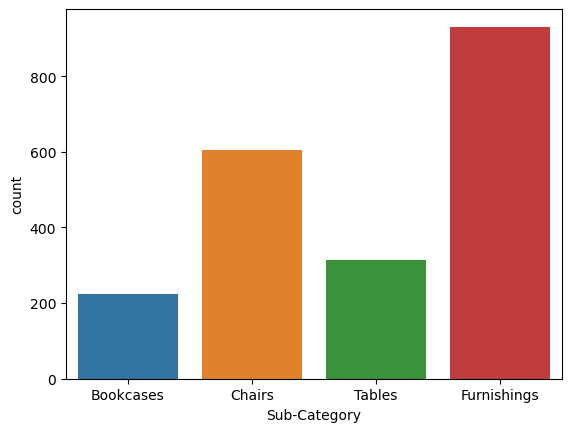

In [77]:
sns.countplot(data=Furniture,x='Sub-Category')
plt.show()